In [1]:
import pandas as pd

df = pd.read_csv('source/dataset_60.csv')
df.head()

,Unnamed: 0,class,course,speed,row,column,hour,day,target
0,0,0.0,0.571429,0.666667,0.936340,0.78750,0.000000,0.819672,675
1,1,0.0,0.571429,0.666667,0.936340,0.78750,0.000000,0.819672,675
2,2,0.0,0.571429,0.666667,0.925729,0.79375,0.000000,0.819672,675
3,3,0.0,0.571429,0.333333,0.907162,0.80000,0.000000,0.819672,794
4,4,0.0,0.000000,0.333333,0.901857,0.80625,0.043478,0.819672,1110


In [15]:
df.shape

(27403430, 9)

In [2]:
X = df[['class','course','speed','row','column','hour','day']]
y = df['target']

In [10]:
import scipy

X = scipy.sparse.csr_matrix(X.values)

In [12]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(X.toarray())
X_pca = pca.transform(X.toarray())

NameError: name 'plt' is not defined

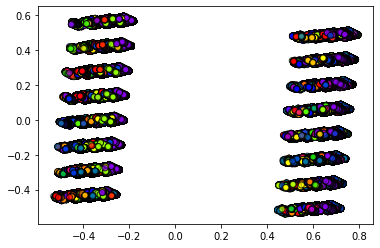

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

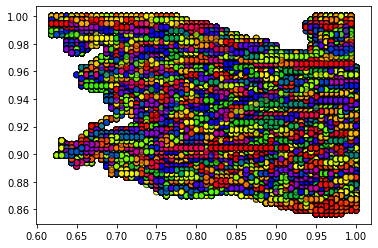

In [14]:
plt.scatter(df['column'], df['row'], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

from numpy import argmax
import numpy as np

def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # Build and Plot PCA
    pca = PCA(n_components=2)
    pca.fit(X_tr.toarray())
    X_pca = pca.transform(X_tr.toarray())

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Build and fit the model
    if class_weight:
        model = DecisionTreeClassifier(class_weight=class_weight)
    else:
        model = DecisionTreeClassifier()
    model.fit(X_tr, y_tr)
    
    # Test the model
    y_pred = model.predict(X_te)
    print('Precision score %s' % precision_score(y_te, y_pred))
    print('Recall score %s' % recall_score(y_te, y_pred))
    print('F1-score score %s' % f1_score(y_te, y_pred))
    print('Accuracy score %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    
    # Plot metrics 
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score)
    plt.show()
    
    plot_cumulative_gain(y_te, y_score)
    plt.show()
    
    plot_lift_curve(y_te, y_score)
    plt.show()
    
    # Print a classification report
    print(classification_report(y_te,y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold